<a href="https://colab.research.google.com/github/nachodelis/PRACTICAS/blob/main/AA_PRACTICA1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grupo 4

##Luis Ignacio de Lis Guijarro

##Carlos Ocón Garay

In [1]:
!git clone https://github.com/nachodelis/AA_PRACTICA1_GRUPO_4.git

fatal: destination path 'AA_PRACTICA1_GRUPO_4' already exists and is not an empty directory.


#Introducción

Utilizaremos la **biblioteca Python Keras** para reconocer y clasificar imágenes de ropa. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

#Importar librerías

In [2]:
#importamos keras
import keras
import tensorflow as tf
from keras import models
from keras import layers
keras.__version__ #Comprobamos que la versión sea 2.0.0 o posterior
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
#importamos lass imagenes y las separamos en train y test
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_images[1])
print(train_labels[1])

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

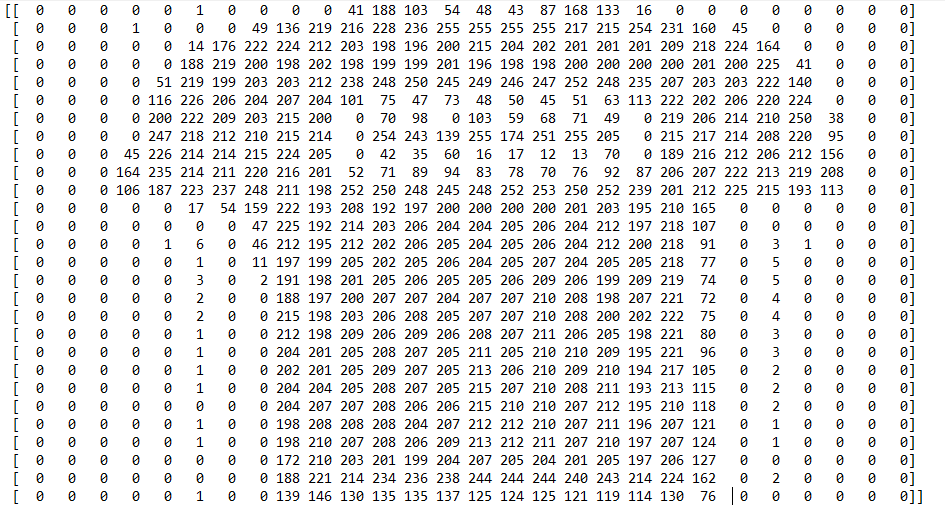

De nuestra primera imagen, podemos observar similitud a una camiseta

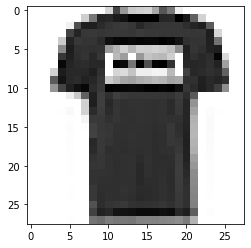

In [5]:
imagen = train_images[1]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

##La ropa viene asignada con las siguientes etiquetas:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

Creamos un vector con las etiquetas en su correspondiente orden.


In [6]:
class_names=["Camiseta","Pantalon","Jersey","Vestido","Cazadora","Sandalia","Camisa","Zapatillas","Bolso","Bota"]
class_names=np.array(class_names)
print(class_names.shape)

(10,)


Ahora, se escalan los valores de entrada en el rango 0-1:

In [7]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

Comprobamos que los datos tienen la forma y valores esperados:

In [8]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))
train_labels

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

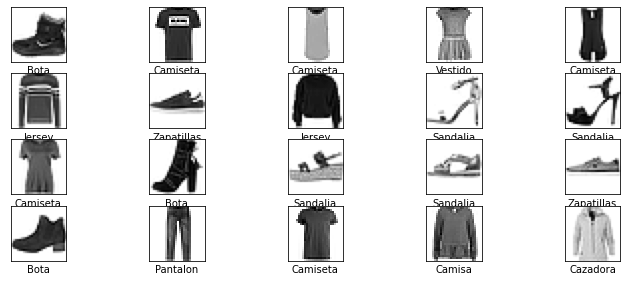

In [9]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#DEFINICIÓN DE MODELOS

Para optimizar el proceso de creación y definición de las redes, almacenaremos en diferentes vectores los valores de cada red.

In [10]:
casos = 8
npc = [10,10,10,10,512,512,512,512]
facp = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optm =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
fp = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
ni = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []

Ahora crearemos nuestras redes y las introduciremos al vector models para que queden ahí almacenadas:

In [11]:
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(npc[caso], activation=facp[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

Utilizamos la función summary para poder ver con mas detalle las redes creadas

In [12]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



CASO  2
---------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
           

Nos queda implementar a los modelos el método de compilación:

In [13]:
for caso in range(casos):
  models[caso].compile(optimizer=optm[caso], loss=fp[caso], metrics=[metrica[caso]])

La función loss dirige el entrenamiento, el optimizador actualiza los parámetros y la métrica monitoriza los pasos de entrenamiento.

#ENTRENAMIENTO DE LOS MODELOS

Con nuestros modelos ya creados, solo nos quedaría entrenarlos y validarlos con nuestro set de test

In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",npc[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",facp[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optm[caso])
  print("FUNCIÓN PÉRDIDA: ",fp[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=ni[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8733 - accuracy: 0.7131
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5638 - accuracy: 0.8063
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5148 - accuracy: 0.8210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4889 - accuracy: 0.8299
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4711 - accuracy: 0.8354



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_cr

Observando los 8 diferentes casos ya entrenados, podemos ver como nuestros mejores casos son el 6 y el 8, teniendo ambos casi un 90% de acierto. Esto se debe a tener un número alto de neuronas en la primera capa, con 512 frente a 10 neuronas de los otros 4 primeros casos. También podemos observar que el optimizador rmsprop funciona mejor que sgd, aunque depende también de la función de activación que se esté empleando.

El peor caso es el caso 3, empieza con una perdida muy alta, de casi 1.7, y solo predice un 73% de los datos. 

Usando un  batch_size de 100, baja el porcentaje de acierto de todas las redes

###**PERDIDA**

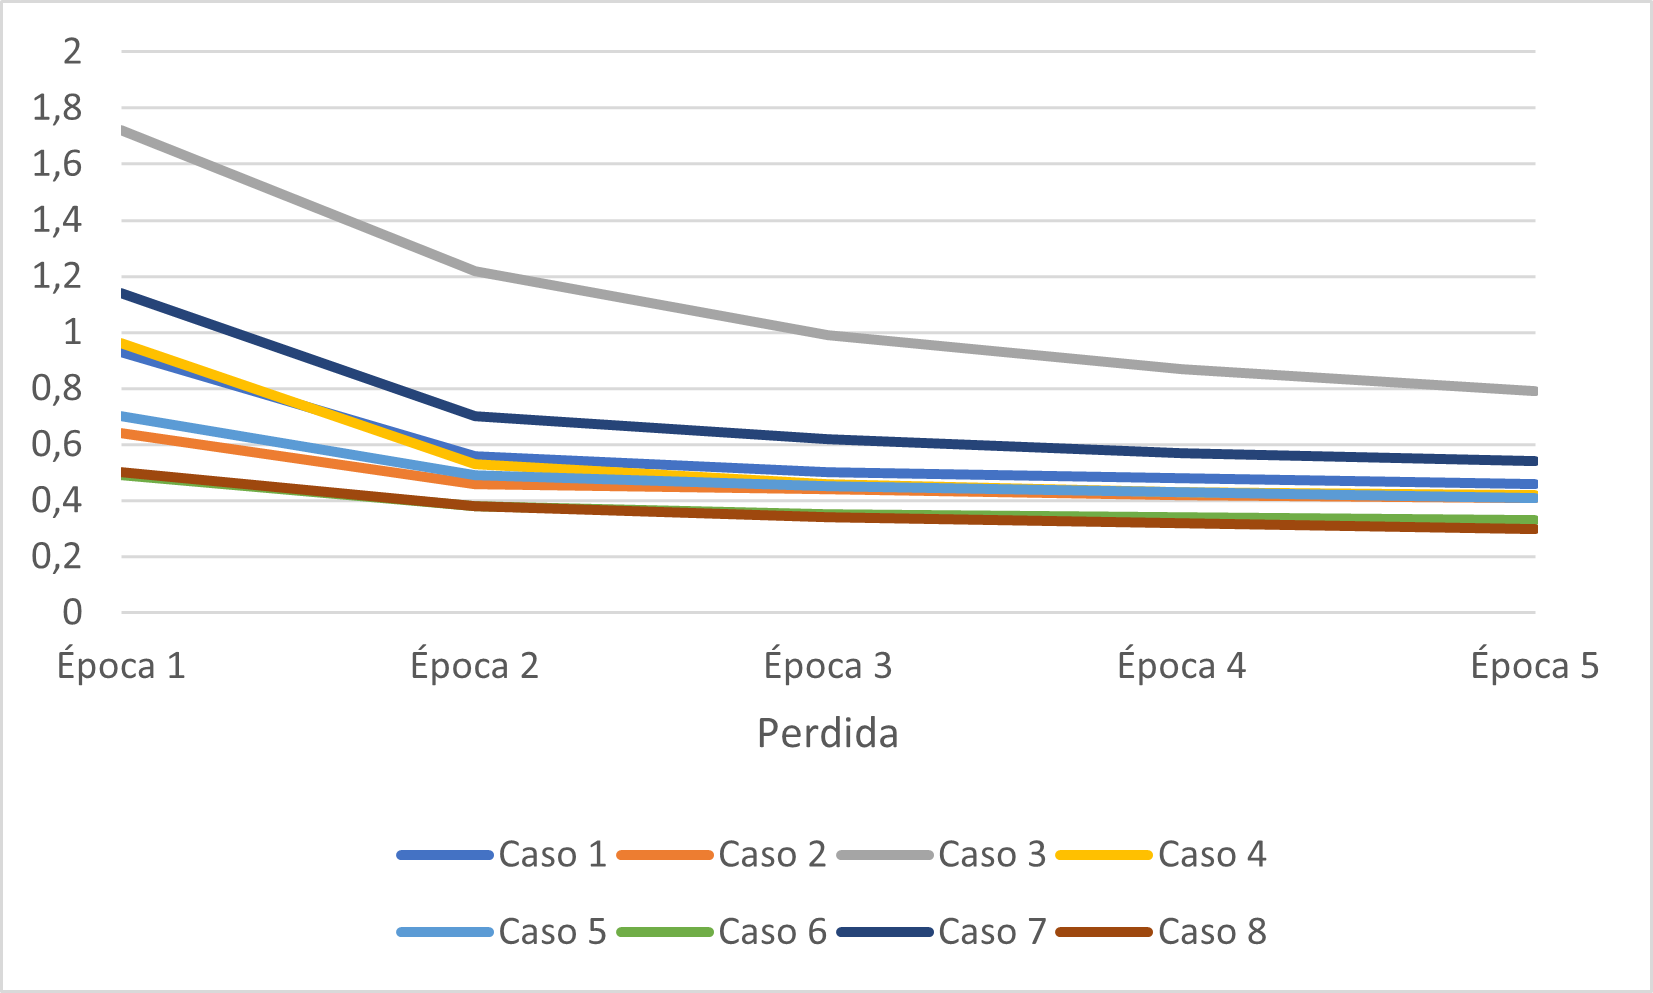

###**PRECISIÓN**

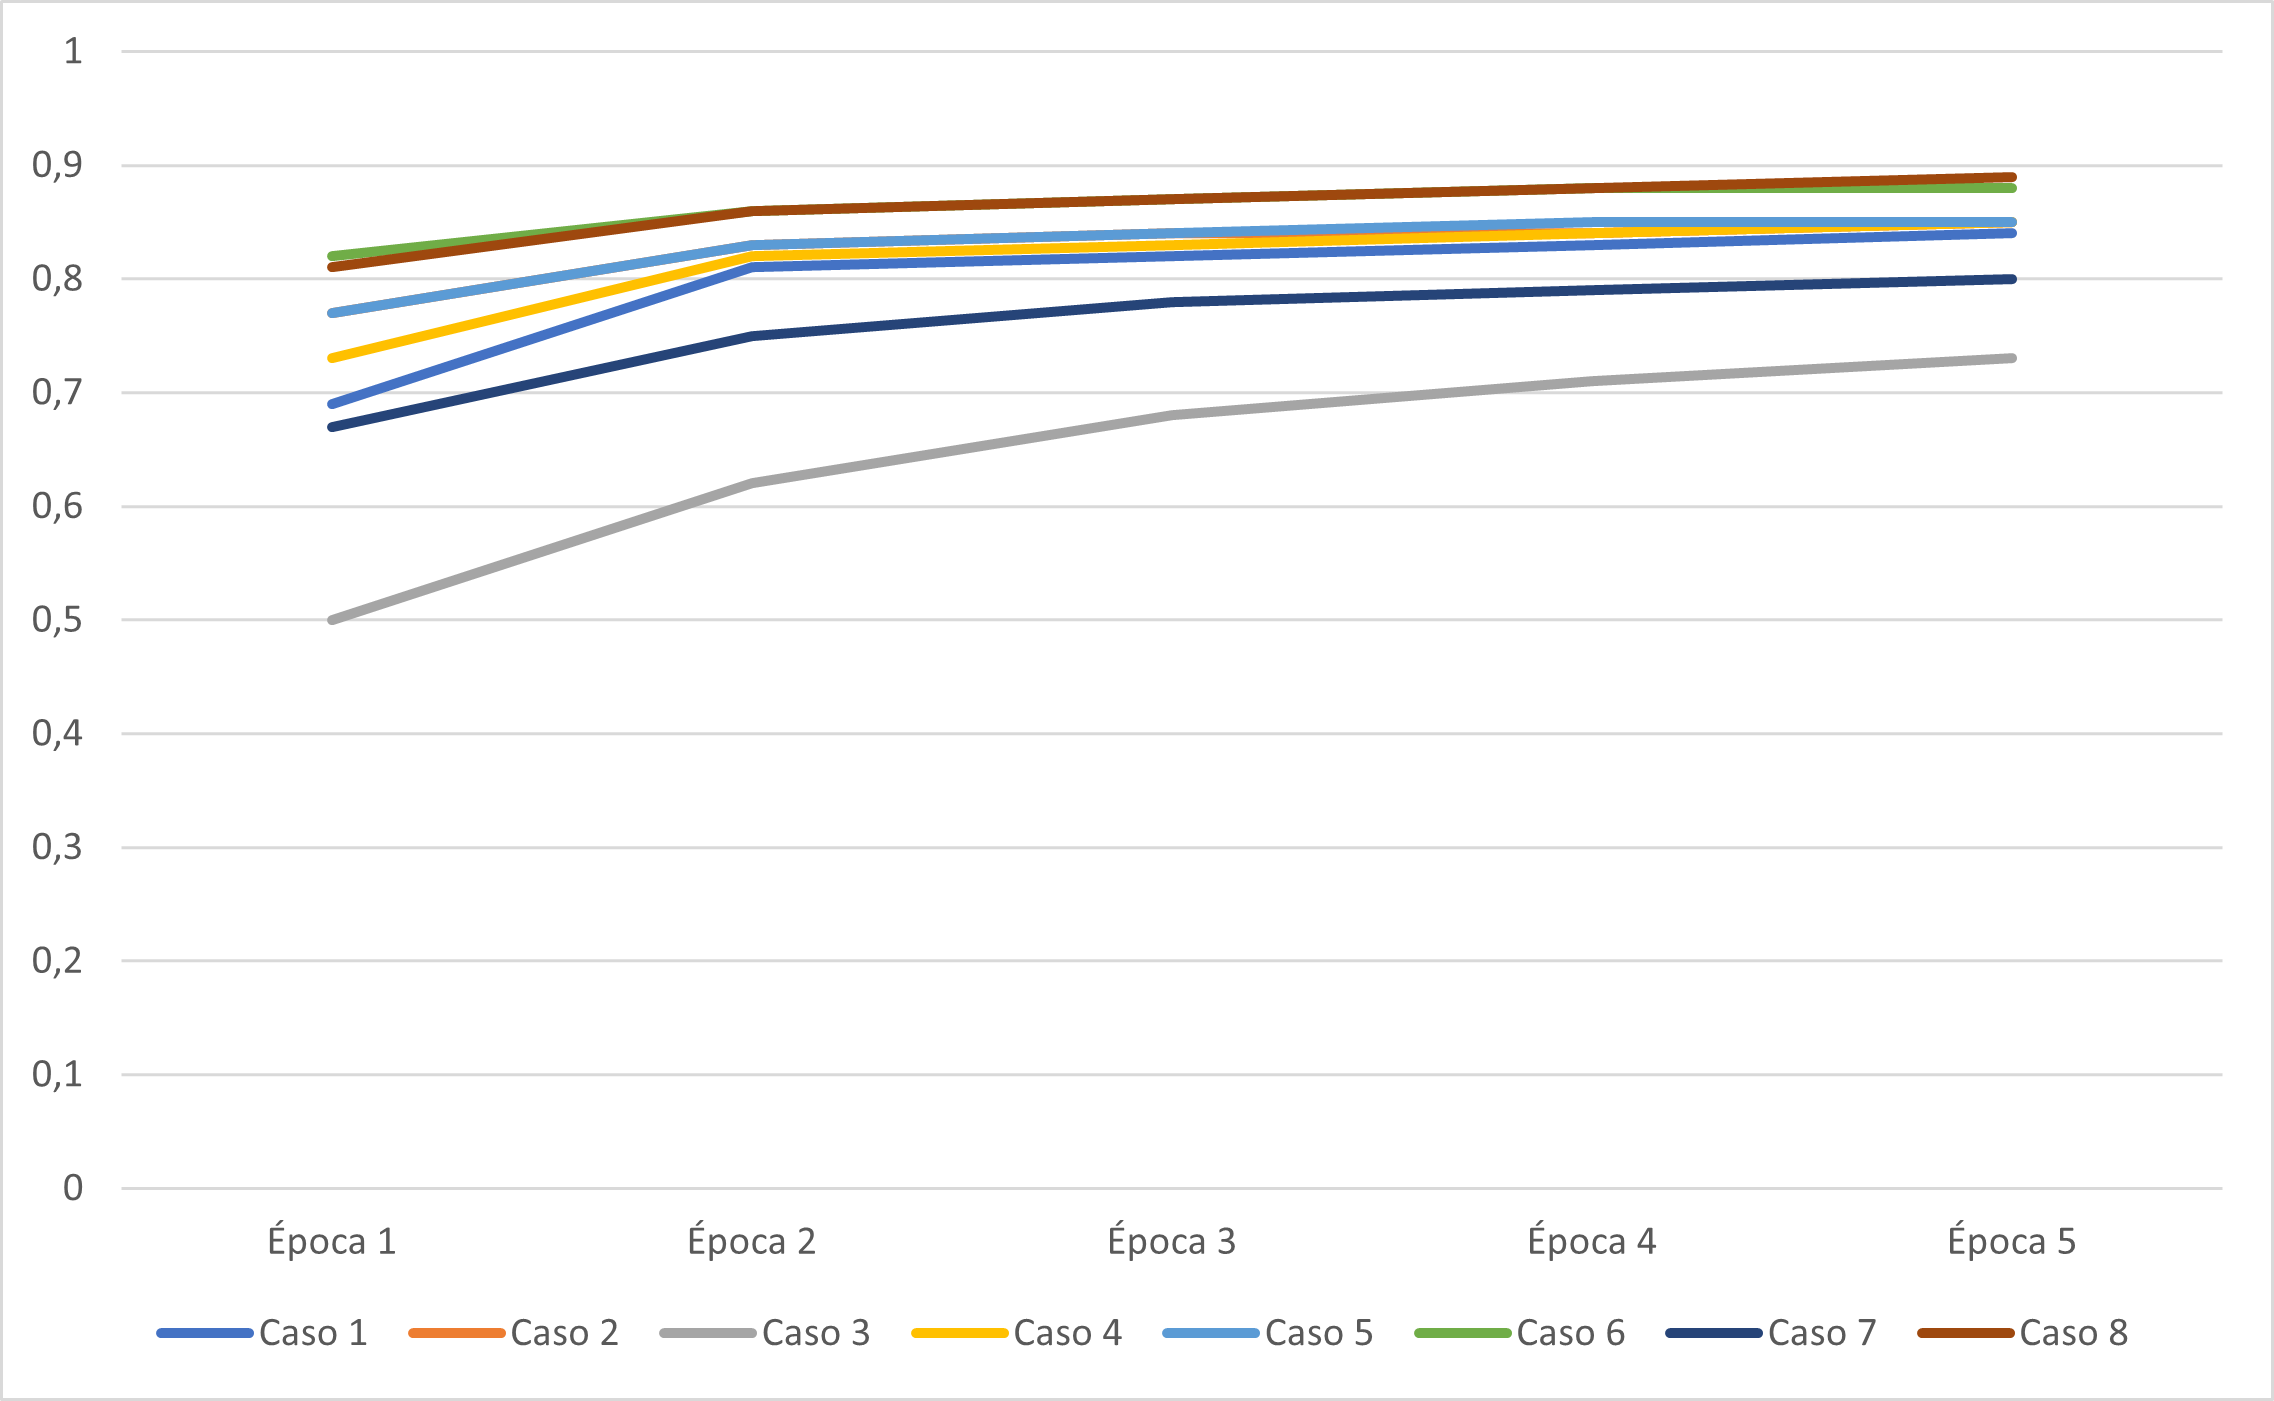

#Evaluación de las redes

In [ ]:

for caso in range(casos):
   print("CASO", caso+1)
   test_loss,test_acc= models[caso].evaluate(test_images, test_labels)
   

Usando nuestro set de testing, podemos observar como los caso 6 y 8 siguen siendo los mejores, y la 8 tiene una menor perdida. También podemos observar como el caso 3 sigue siendo el peor, al obtener un 75%.


##Matriz de confusión:

In [ ]:

test_labelsp = to_categorical(test_labels)
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')





A través de la diagonal de la matriz podemos observar el numero de veces que ha acertado la prenda, mientras que en el resto de la matriz podemos ver que número de veces ha fallado

In [ ]:
print("Caso 1")
Y_pred = models[0].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))





In [ ]:
print("Caso 2")
Y_pred = models[1].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 3")
Y_pred = models[2].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 4")
Y_pred = models[3].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 5")
Y_pred = models[4].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 6")
Y_pred = models[5].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 7")
Y_pred = models[6].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print("Caso 8")
Y_pred = models[7].predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labelsp, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#25 EPOCAS CASO 2 Y 7

In [ ]:
models25=[]
for caso in range(casos):
  if caso == 1 or caso == 6:
    model25 = Sequential()
    model25.add(Flatten(input_shape=(28, 28)))
    model25.add(Dense(npc[caso], activation=facp[caso]))
    model25.add(Dense(10, activation='softmax'))
    models25.append(model25)
    


In [ ]:
 i=0
 for caso in range(casos):
   if caso == 1 or caso == 6:
    models25[i].compile(optimizer=optm[caso], loss=fp[caso], metrics=[metrica[caso]])
    print("CASO ",caso + 1)
    print("---------------------------------")
    print("NÚMERO NEURONAS PRIMERA CAPA: ",npc[caso])
    print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",facp[caso])
    print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
    print("OPTIMIZADOR: ", optm[caso])
    print("FUNCIÓN PÉRDIDA: ",fp[caso])
    print("MÉTRICA: ",metrica[caso])
    print("---------------------------------")
    models25[i].fit(train_images, train_labels, epochs=25)
    print("\n\n")
    i=i+1

Ahora lo probamos con nuestro set de test:

In [ ]:
i=0
for caso in range(casos):
  if caso==1 or caso ==6:
    print("CASO", caso+1)
    test_loss, test_acc =models25[i].evaluate(test_images, test_labels)
    i=i+1
   

Con 5 iteraciones hemos obtenido:

* CASO 2
  - PERDIDA: 0,46
  - PRECISIÓN: 0,84
* CASO 7
  - PERDIDA: 0,55
  - PRECISIÓN: 0,8

Con 25 iteraciones hemos obtenido: 

* CASO 2
  - PERDIDA: 0,45
  - PRECISIÓN: 0,84
* CASO 7
  - PERDIDA: 0,45
  - PRECISIÓN: 0,83

Podemos observar como para el caso 7 si ha mejorado nuestra red, pero no tanto como para ser lo suficientemente óptima.




#PREDICCIÓN SEXTA IMAGEN

Funciones para mostrar las imagenes y sus gráficas

In [ ]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img = predictions_array, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [ ]:
def plot_value_array(i, predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array,)
  thisplot[predicted_label].set_color('green')

Haremos una predicción con las sexta imagen en cada uno de nuestros casos:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[0]
predtrain_images = predtrain_images.astype('float32')
predtest_images = predtest_images.astype('float32')

predtrain_images = predtrain_images / 255.0
predtest_images = predtest_images / 255.0

Primero transformamos los datos

In [ ]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(predtest_images))
  print("Caso", caso+1)
  print("Predicción:", np.argmax(predictions[caso][5]))

Guardamos las predicciones de cada modelo en el vector predictions y obtenemos el valor de su posición con el valor máximo a traves de argmax. Podemos ver como todos los modelos predicen de que la prenda es un pantalón.

In [ ]:
imagen = predtest_images[5]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

La imagen número 6 es un pantalón, en este caso todas las redes han acertado

In [ ]:
def prediccion_un_caso(caso_concreto):
  for caso in range(casos):
    print("Prediccion caso", caso + 1)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,2)
    plot_value_array(caso_concreto, predictions[caso][caso_concreto],  predtest_labels)
    plt.show()
    print("\n\n")

prediccion_un_caso(5)

Observando las gráficas también podemos ver como todas dan una alta probabilidad de que la imagen es un pantalón. Posiblemente esto ocurra ya que el pantalón tiene una forma distinta a cualquier tipo de prenda y por lo tanto para las redes sea más fácil aprenderla.

#PREDICCIÓN DE LAS 10 PRIMERAS IMAGENES

In [ ]:
def prediccion_varios_casos(casos,ndc):
  for caso in range(casos):
    print("caso",caso+1)
    for num in range(ndc):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(num, predictions[caso][num], test_labels, test_images)
      plt.subplot(1,2,2)
      plot_value_array(num, predictions[caso][num],  test_labels)
      plt.show()
      print("\n\n")
 
prediccion_varios_casos(casos,10)

Haciendo un estudio de las gráficas, el porcentaje de acierto general es elevado, yendonos a cada caso, cabe destacar que la numero 6 y la 8 tienen un acierto con alta probabilidad siempre, y que en las redes que falla, suelen ser prendas con formas parecidas, por ejemplo sandalias y zapatillas, o camisetas y camisas

#OPTIMIZADOR ADAM

Aplicar el optimizador Adam al caso 3:

In [ ]:


modeladam = Sequential()
modeladam.add(Flatten(input_shape=(28, 28)))
modeladam.add(Dense(npc[2], activation=facp[2]))
modeladam.add(Dense(10, activation='softmax'))

modeladam.compile(optimizer='adam', loss=fp[2], metrics=[metrica[2]])
print("CASO ",3)
print("---------------------------------")
print("NÚMERO NEURONAS PRIMERA CAPA: ",npc[2])
print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",facp[2])
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
print("OPTIMIZADOR: adam")
print("FUNCIÓN PÉRDIDA: ",fp[2])
print("MÉTRICA: ",metrica[2])
print("---------------------------------")
modeladam.fit(train_images, train_labels, epochs=5)



In [ ]:
test_loss, test_acc =modeladam.evaluate(test_images, test_labels)

En el caso 3, podemos ver como el optimizador ha mejorado la red en casi un 10%, probemos con otra red:

In [ ]:
modeladam = Sequential()
modeladam.add(Flatten(input_shape=(28, 28)))
modeladam.add(Dense(npc[7], activation=facp[7]))
modeladam.add(Dense(10, activation='softmax'))

modeladam.compile(optimizer='adam', loss=fp[7], metrics=[metrica[7]])
print("CASO ",8)
print("---------------------------------")
print("NÚMERO NEURONAS PRIMERA CAPA: ",npc[7])
print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",facp[7])
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
print("OPTIMIZADOR: adam")
print("FUNCIÓN PÉRDIDA: ",fp[7])
print("MÉTRICA: ",metrica[7])
print("---------------------------------")
modeladam.fit(train_images, train_labels, epochs=5)

Con el caso 8, se llega a superar el 90%, podemos concluir que el optimizador adam es más útil para estas redes que los otros.

#Trabajo

El trabajo se ha realizado mediante un estudio y entendimiento de los ejemplos dados en clase, su funcionamiento, y el código. Después de esto, el alumno Luis Ignacio de Lis se ha encargado mayoritariamente del código mientrás que el alumno Ocón Garay se ha encargado de la redacción y las conclusiones.

#Conclusión

Tras poder haber ido a traves de los distintos casos, hemos podido comprobar que para poder obtener una red neuronal óptima, hay que experimentar con distintas capas y neuronas, a la par de sus distintas opciones, ya sean los optimizadores, las funciones de perdida o de activación, y el número de épocas. 

Las opciones mas acertada en este tipo de red neuronal son el caso 6 y 8, al tener el mayor porcentaje de acierto, utlizando 512 neuronas en la segunda capa, función de activación relu y sigmoid, y optimizador rmsprop.

Entre estas dos, nos debemos quedar con el caso 8 al tener menos perdida.